In [1]:
import pandas as pd
import numpy as np


In [2]:
credits = pd.read_csv( 'tmdb_5000_credits.csv' )
movies = pd.read_csv( 'tmdb_5000_movies.csv' )

In [3]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
credits.shape

(4803, 4)

In [4]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
movies.shape

(4803, 20)

In [8]:
merge_df = pd.merge( credits , movies , how = 'inner' , left_on = 'movie_id' , right_on = 'id')

In [9]:
merge_df.shape

(4803, 24)

In [13]:
pd.set_option('display.max_columns' , None)

In [14]:
merge_df.head(1)

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [16]:
merge_df.drop(columns = ['title_x' , 'title_y' , 'homepage' , 'status' , 'production_countries'] , inplace = True)

In [17]:
# Formula

# w = ( Rv + cm ) / ( v + m )

# rv - average rating of a movie
# cm - mean for all the movies
# v - number of voters 
# m - minimum threshold to be listed in top data


In [19]:
v=merge_df['vote_count']
R=merge_df['vote_average']
C=merge_df['vote_average'].mean()
m=merge_df['vote_count'].quantile(0.70)

In [20]:
merge_df['weighted_average']=((R*v)+ (C*m))/(v+m)

# Top Movies Based on Weighted_average

In [21]:
merge_df=merge_df.sort_values('weighted_average',ascending=False)
merge_df[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


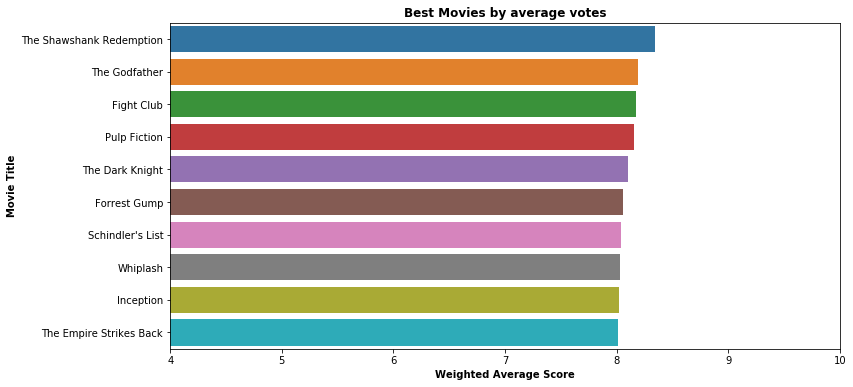

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=merge_df.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

# Based On Popularity

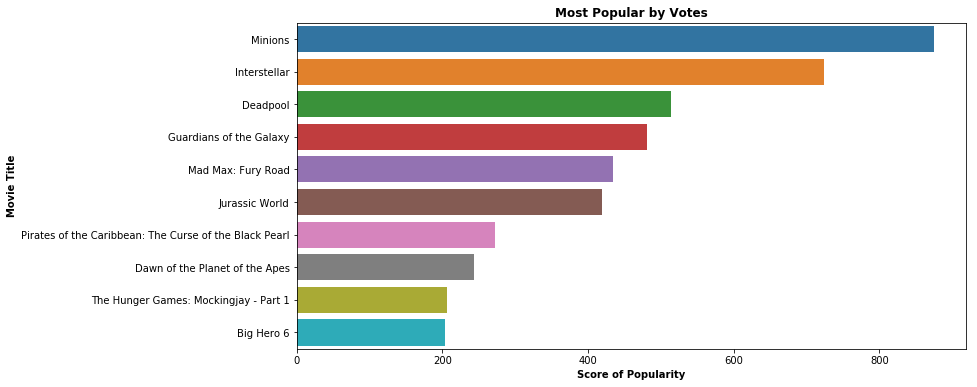

In [24]:
popularity=merge_df.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

# We can see different movie poping up in both the cases, so we are doing a scaled weighted average and popularity score ( 50% to both)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(merge_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(merge_df,columns=['weighted_average','popularity'])
merge_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

merge_df['score'] = merge_df['normalized_weight_average'] * 0.5 + merge_df['normalized_popularity'] * 0.5
movies_scored_df = merge_df.sort_values(['score'], ascending=False)

Text(0, 0.5, 'Movie Title')

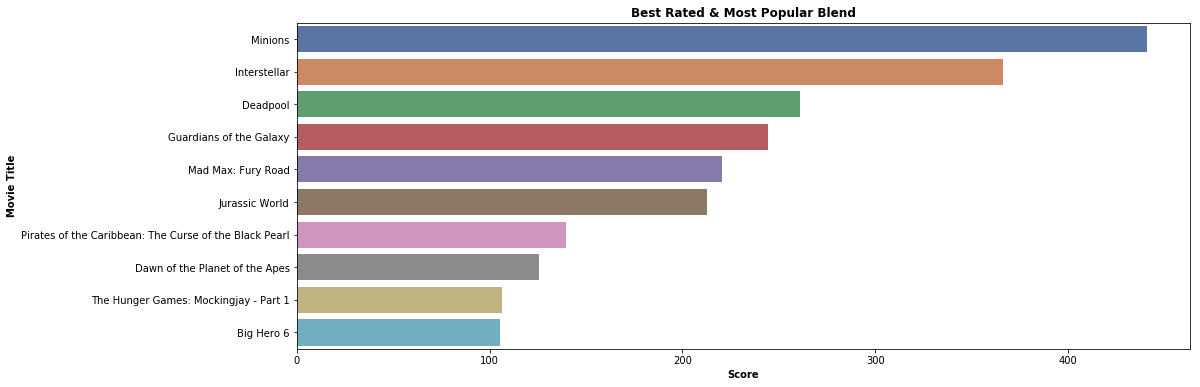

In [28]:
scored_df = merge_df.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

# Content Based Recommendation System

In [30]:
merge_df.head(1)['overview']

1881    Framed in the 1940s for the double murder of h...
Name: overview, dtype: object

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using Abhishek Thakur's arguments for TF-IDF
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies['overview'] = movies['overview'].fillna('')

In [85]:
tfv_matrix = tfv.fit_transform(movies['overview'])

In [86]:
pd.DataFrame( tfv_matrix.toarray() , columns = tfv.get_feature_names() ).head(3)

,00,000,000 feet,000 years,007,1,1 000,10,10 million,10 year,10 year old,10 years,100,10th,11,11 year,11 year old,11th,12,12 year,12 year old,12 years,12th,13,13 year,13 year old,14,14 year,14 year old,15,15 year,15 year old,15 years,150,150 million,15th,16,16 year,16 year old,16th,16th century,17,17 year,17 year old,17th,17th century,18,18 year,18 year old,1800,1863,1890,18th,18th birthday,18th century,19,19 year,19 year old,19 years,1910,1920,1920 s,1920s,1927,1930s,1933,1937,1939,1940,1940s,1941,1944,1945,1947,1949,1950,1950 s,1950s,1955,1959,1960,1960 s,1960s,1962,1964,1965,1967,1968,1969,1970s,1971,1972,1973,1974,1975,1976,1977,1979,1980,1980 s,1980s,1984,1985,1986,1987,1988,1990,1990s,1991,1992,1994,1995,1996,1997,1998,1999,19th,19th century,2,2 million,20,20 year,20 year old,20 years,200,200 000,2000,2001,2002,2003,2004,2005,2007,2008,2009,2010,2011,2012,2013,2019,20th,20th century,21,21 year,21 year old,21st,21st century,22nd,22nd century,23,23 year,23 year old,24,24 hour,24 hours,25,25 years,27,27 year,27 year old,28,29,2nd,3,3 d,30,30 000,30 years,300,300 years,30s,35,3d,4,40,40 year,40 year old,40 years,400,47,48,48 hours,4th,5,5 years,50,50 000,50 years,500,50s,51,54,6,6 year,6 year old,60,60 s,60s,66,7,7 years,70,70s,7th,8,8 year,8 year old,80,80s,9,9 11,aaron,abandoned,abandons,abby,abduct,abducted,abductions,abducts,abigail,abilities,ability,able,aboard,abraham,abroad,abrupt,abruptly,absence,absent,absent father,absolute,absolutely,absurd,abuse,abused,abusive,abusive father,academic,academy,academy award,academy awards,accept,acceptance,accepted,accepts,accepts offer,access,accident,accident leaves,accidental,accidental death,accidentally,accidentally gets,accidentally transported,accidents,acclaim,acclaimed,accompanied,accompanies,accompanying,accomplish,accomplished,account,accountant,accounts,accuracy,accused,accused murdering,accuses,ace,achieve,achieved,achieves,achieving,acquaintance,acquaintances,acquired,acquitted,acre,act,acting,action,action adventure,action movie,action packed,action thriller,actions,active,activist,activists,activities,activity,actor,actors,actress,acts,actual,actual events,actually,ad,adam,adams,adapt,adaptation,adaptation classic,adapted,adapts,add,addict,addicted,addiction,addition,addled,adds,adjust,adjust new,administration,admiral,admiral kirk,admired,admit,admits,adolescent,adolf,adolf hitler,adopt,adopted,adopted son,adoption,adopts,adorable,adrenaline,adrian,adrift,adult,adult film,adulthood,adults,advanced,advantage,adventure,adventure lifetime,adventure story,adventures,adventurous,advertisement,advertising,advertising executive,advice,adviser,afar,affable,affair,affairs,affect,affected,affection,affections,afflicted,affluent,afford,afghanistan,afraid,africa,african,african american,afro,afterlife,aftermath,afternoon,age,age story,age tale,aged,agency,agency known,agenda,agent,agent 007,agent frank,agent s,agent sent,agents,ages,aggressive,aging,ago,agree,agreed,agrees,ahead,ahmad,aid,aide,aided,aids,ailing,ailing father,aim,aiming,aims,air,air force,air traffic,air traffic controller,airborne,airborne virus,aircraft,airplane,airport,aisle,aka,al,alabama,alan,alaska,alaskan,albeit,albert,alcohol,alcoholic,alec,alex,alex cross,alexander,algeria,ali,ali s,alice,alice s,alien,alien force,alien invasion,alien planet,alien race,alienated,aliens,alike,alive,allegations,allegedly,allen,alliance,alliances,allied,allied forces,allies,allow,allowed,allowing,allows,alluring,ally,alongside,alpha,alter,alter ego,altered,altering,alternate,alternate reality,alternate universe,alternative,alvin,alzheimer,alzheimer s,alzheimer s disease,amanda,amateur,amazing,amazon,ambassador,amber,ambiguous,ambition,ambitions,ambitious,ambitious reporter,ambitious young,ambulance,ambushed,amelia,america,america s,american,american civil,american civil war,american couple,american culture,american dream,american family,american girl,american history,american journalist,american soldiers,american south,am

In [87]:
from sklearn.metrics.pairwise import cosine_similarity

In [88]:
sim = cosine_similarity( tfv_matrix , tfv_matrix )

In [75]:
movie_name = 'Spy Kids'

In [89]:
mov_ind = pd.Series( movies['original_title'].index , movies['original_title'].values )
mov_ind.drop_duplicates(inplace = True)
mov_ind.head()

Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [90]:
ind = mov_ind.loc[movie_name]

- Selecting top 10 related to the selected movie_name 

In [91]:
top = sorted( [ (k,v) for k,v in list(enumerate(sim[ ind  , : ] )) if k!= ind] , key = lambda x : x[1] , reverse = True )


In [92]:
top[:10]

[(1302, 0.2679121753804314),
 (1155, 0.21378880445893894),
 (1769, 0.19626862144670196),
 (4044, 0.1706737612079048),
 (3359, 0.14618028117698345),
 (1631, 0.11183433155669636),
 (1825, 0.10743236637111894),
 (339, 0.10530929882512574),
 (3793, 0.10217580219309763),
 (1081, 0.09768889294909247)]

In [95]:
print( 'Top 10 related movies for the movie - ' , movie_name )

mov_ind[ mov_ind.isin( [ k for k,v in top[:10] ] ) ].index.tolist()

Top 10 related movies for the movie -  Spy Kids


['The Incredibles',
 'Revolutionary Road',
 'Spy Kids 3-D: Game Over',
 'Spy Kids 2: The Island of Lost Dreams',
 'Mr. 3000',
 'Spy Kids: All the Time in the World',
 'Jimmy Neutron: Boy Genius',
 'In Too Deep',
 'The Velocity of Gary',
 'Go for It!']